In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('train_airlines.csv')

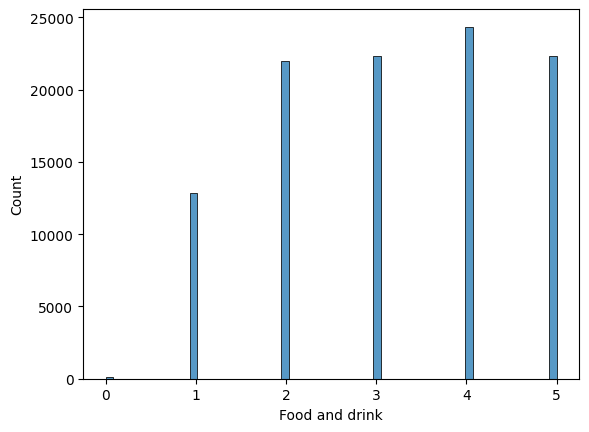

-0.1512794969916901

In [19]:
sns.histplot(df, x='Food and drink')
plt.show()

df['Food and drink'].skew()